In [ ]:
### Part 1: Import relevant libraries and conduct preliminary data exploration ###

In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from pylab import rcParams
import os
sns.set() 

In [2]:
# Read in the dataset

os.chdir(r'/Users/nicholassimon/Desktop/Portfolio Projects/Python/Insurance Visualization')
df = pd.read_csv("insurance_data.csv")

In [3]:
# Look at the first 10 rows of the dataset

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Explore the datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Determine the shape of the dataset

df.shape

(1338, 7)

In [ ]:
### Part 2: Check for missing values and outliers ###

In [6]:
# Check for missing values

df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


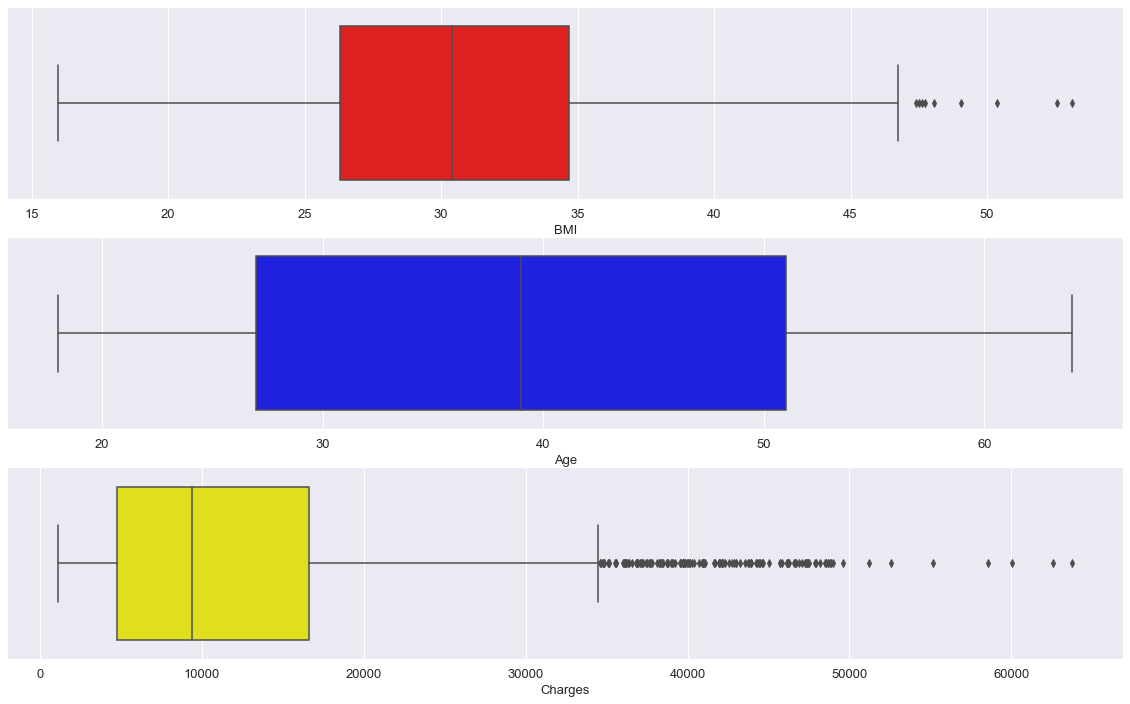

In [8]:
# Use a box and whisker plot to check for outliers

plt.figure(figsize= (20,12))

plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color='red')
plt.xlabel('BMI', {'size':13})
plt.xticks(fontsize=13)


plt.subplot(3,1,2)
sns.boxplot(x=df.age, color='blue')
plt.xlabel('Age', {'size':13})
plt.xticks(fontsize=13)


plt.subplot(3,1,3)
sns.boxplot(x=df.charges, color='yellow')
plt.xlabel('Charges', {'size':13})
plt.xticks(fontsize=13)

plt.show()

In [ ]:
# Analysis:

# - There are no missing values
# - BMI has a few outliers
# - Age doesn't appear to have any outliers
# - Charges has many outliers

In [ ]:
### Part 3: Create additional visualizations to further analyze the data ###

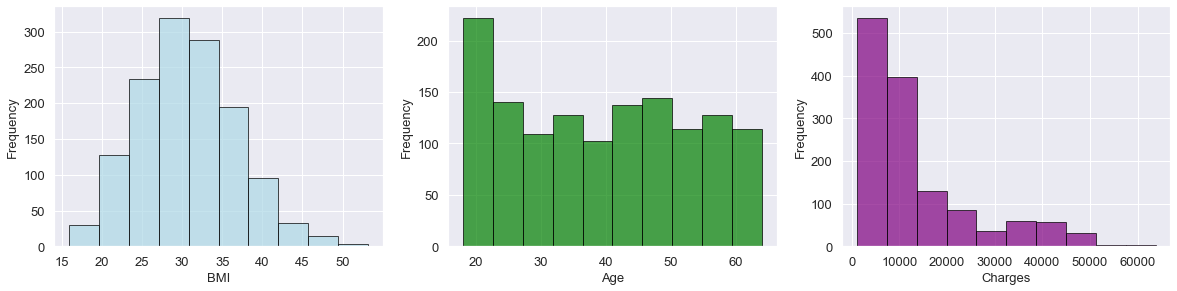

In [9]:
# Use histograms to determine the distribution of BMI, age, and charges

plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('BMI',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Frequency', {'size':13})
plt.yticks(fontsize=13)

plt.subplot(3,3,2)
plt.hist(df.age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Frequency', {'size':13})
plt.yticks(fontsize=13)

plt.subplot(3,3,3)
plt.hist(df.charges, color='purple', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Charges',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Frequency', {'size':13})
plt.yticks(fontsize=13)

plt.show()

In [ ]:
# Analysis:

# - BMI is normally distributed
# - Age appears to be uniformly distributed between the ages of about 25-65
# - Charges are right skewed

In [11]:
# The extent to which BMI, age, and charges are skewed can be determined by using the code below:
    
skewness = pd.DataFrame({'Skewness' : [stats.skew(df.age), stats.skew(df.bmi), stats.skew(df.charges)]},
                        index=['age', 'bmi', 'charges'])

print(skewness)

         Skewness
age      0.055610
bmi      0.283729
charges  1.514180


In [ ]:
# Analysis: Charges has the highest skewness value. This accords with the histograms shown above.

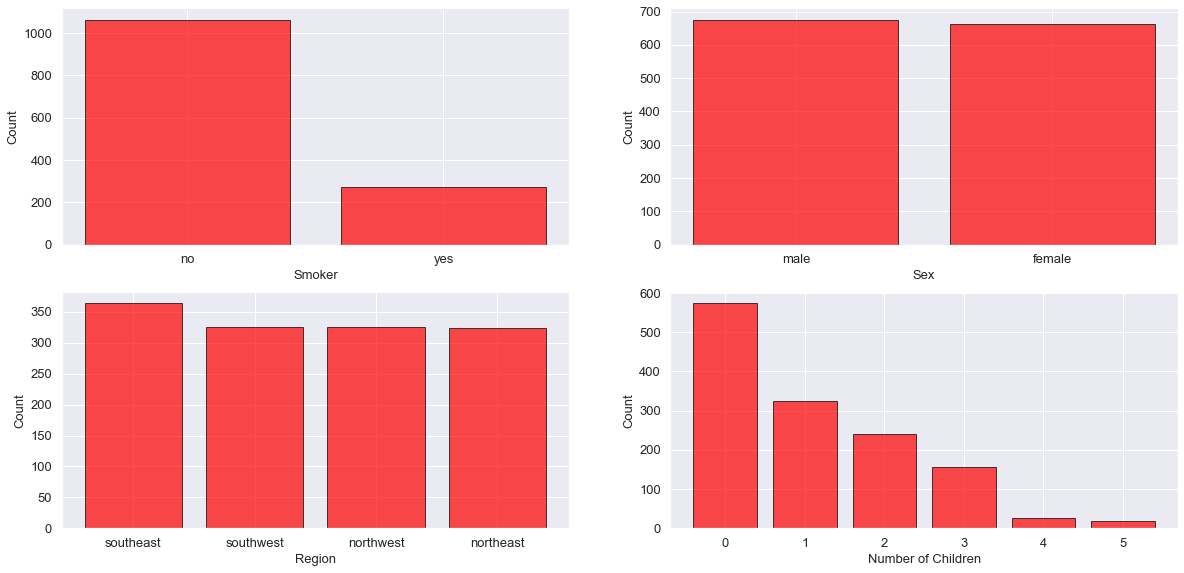

In [12]:
# Use bar charts to determine the distributions of smoker, sex, region, and number of children

plt.figure(figsize=(20,20))

# PLOT 1
x = df.smoker.value_counts().index   
y = [df['smoker'].value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Smoker',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Count', {'size':13})
plt.yticks(fontsize=13)


# PLOT 2
x1 = df.sex.value_counts().index    
y1 = [df['sex'].value_counts()[j] for j in x1]   

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Sex',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Count', {'size':13})
plt.yticks(fontsize=13)


# PLOT 3
x2 = df.region.value_counts().index    
y2 = [df['region'].value_counts()[k] for k in x2]   

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Region',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Count', {'size':13})
plt.yticks(fontsize=13)


# PLOT 4
x3 = df.children.value_counts().index   
y3 = [df['children'].value_counts()[l] for l in x3]   

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Number of Children',{'size':13})
plt.xticks(fontsize=13)
plt.ylabel('Count', {'size':13})
plt.yticks(fontsize=13)

plt.show()

In [ ]:
# Analysis:

# - There are many more non-smokers than smokers in the dataset
# - Observations in the dataset are distributed fairly evenly across all regions and both sexes
# - Most individuals who appear in the dataset have less than three children and very few have four or five children

In [ ]:
### Part 4: Analyze the relationships between certain variables and charges ###

In [13]:
# Housekeeping code

warnings.filterwarnings("ignore")
rcParams['font.size'] = 13

In [103]:
# Determine whether smokers and non-smokers experience the same charges by using graphics and a t-test

In [14]:
# Create a function that depicts the distribution of charges for the input variable and shows the mean of the distribution

def plot_distribution(inp):
    plt.figure(figsize=(10,5)) 
    plt.xlabel('Charges', {'size':13})
    plt.ylabel('Frequency', {'size':13})
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

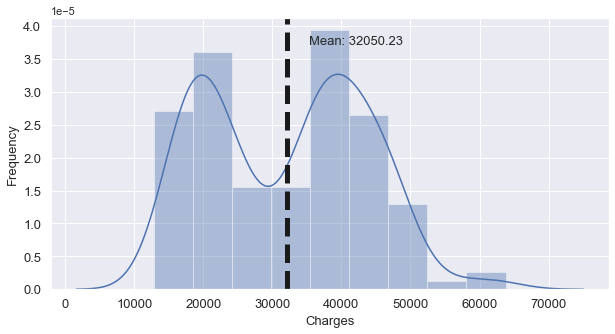

In [15]:
# Create a histogram that depicts the distribution of charges for smokers and shows the mean of the distribution

x = np.array(df[df.smoker == 'yes'].charges)
plot_distribution(x)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

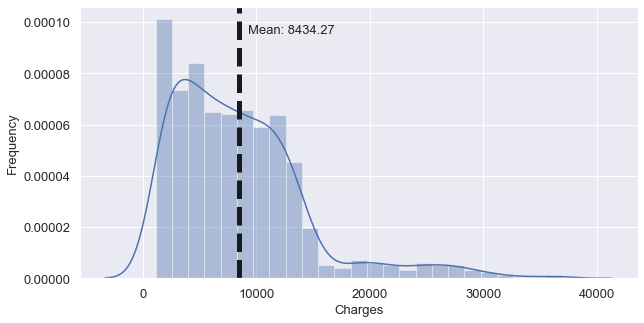

In [16]:
# Create a histogram that depicts the distribution of charges for non-smokers and shows the mean of the distribution 

y = np.array(df[df.smoker == 'no'].charges)
plot_distribution(y)

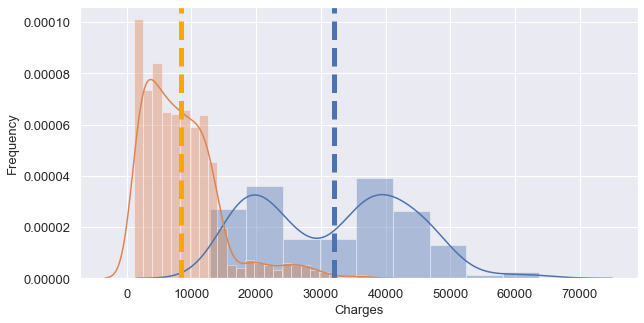

In [17]:
# Create a plot that combines the two histograms shown above

plt.figure(figsize=(10,5))
plt.xlabel('Charges', {'size':13})
plt.ylabel('Frequency', {'size':13})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax1 = sns.distplot(x)
ax2 = sns.distplot(y)
plt.axvline(np.mean(x), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(y), color='orange', linestyle='dashed', linewidth=5)

In [58]:
# Analysis: Based on the plots shown above, it appears that smokers are charged more by their insurers than non-smokers.

In [18]:
# Use a t-test to confirm what the plots show

Ho = "Smokers and non-smokers are charged the same amount,"  
Ha = "Smokers and non-smokers aren't charged the same amount,"   


t, p_value  = stats.ttest_ind(x,y, axis = 0)  
p_value = round(p_value, 5)


if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) is less than 0.05.')
else:
    print(f'{Ho} as the p_value ({p_value}) is greater than 0.05.')

Smokers and non-smokers aren't charged the same amount, as the p_value (0.0) is less than 0.05.


In [60]:
# Analysis: The outputs shown above let us confirm that - at least in this dataset - smokers and non-smokers 
# aren't charged the same amount by their insurers. 

In [61]:
# Determine whether men and women experience the same charges by using graphics and a t-test

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

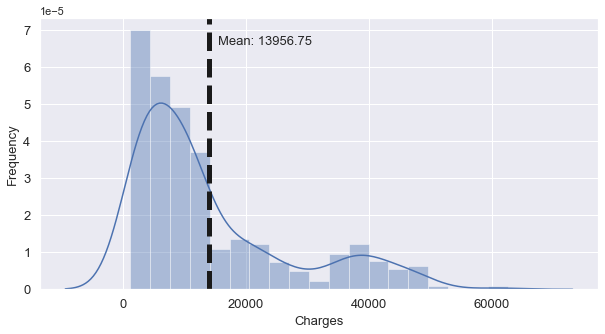

In [19]:
# Create a histogram that depicts the distribution of charges for men and shows the mean of the distribution

a = np.array(df[df.sex == 'male'].charges)
plot_distribution(a)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

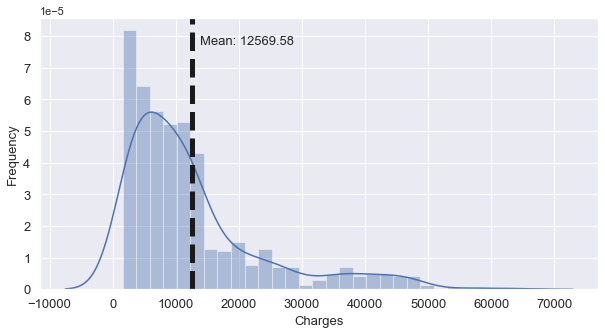

In [20]:
# Create a histogram that depicts the distribution of charges for women and shows the mean of the distribution

b = np.array(df[df.sex == 'female'].charges)
plot_distribution(b)

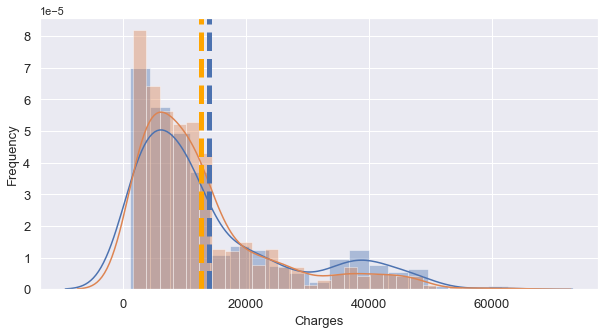

In [21]:
# Create a plot that combines the two histograms shown above

plt.figure(figsize=(10,5))
plt.xlabel('Charges', {'size':13})
plt.ylabel('Frequency', {'size':13})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax1 = sns.distplot(a)
ax2 = sns.distplot(b)
plt.axvline(np.mean(a), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(b), color='orange', linestyle='dashed', linewidth=5)

In [113]:
# Analysis: Based on the plots shown above, it appears that men and women aren't charged the same amount 
# by their insurers, with men being charged slightly more than women. 

In [22]:
# Use a t-test to confirm what the plots show

Ho = "Men and women are charged the same amount,"  
Ha = "Men and women aren't charged the same amount,"   


t, p_value  = stats.ttest_ind(a,b, axis = 0)
p_value = round(p_value, 5)


if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) is less than 0.05.')
else:
    print(f'{Ho} as the p_value ({p_value}) is greater than 0.05.')

Men and women aren't charged the same amount, as the p_value (0.03613) is less than 0.05.


In [115]:
# Analysis: The outputs shown above let us confirm that - at least in this dataset - men and women 
# aren't charged the same amount by their insurers. 